<a href="https://colab.research.google.com/github/Fateme-zangane/Using-Detectron/blob/main/detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!nvidia-smi

Thu Sep  5 17:04:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0              28W /  70W |   2457MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
!pip install pyyaml==5.1
!pip install torch==1.8.1
!pip install torchvision==0.9.1
!pip install torchaudio==0.8.1
#print(torch.__version__, torch.cuda.is_available())
#!pip install detectron2 -fhttps://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install cython
!pip install pycocotools
#import os
#os.environ['PYTHONPATH'] +=':/usr/local/lib/python3.7/site-packages'
#import detectron2




  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement torch==1.8.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.8.1
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision

In [17]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.33.0
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.14
albumentations                   1.4.14
altair                           4.2.2
annotated-types                  0.7.0
antlr4-python3-runtime           4.9.3
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.3
astropy-iers-data                0.2024.8.27.10.28.29
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                  

In [18]:
import os
img_path = '/content/Rasht.jpg'  # Adjust based on your file location

# Check if the file exists
if not os.path.exists(img_path):
    print(f"File not found: {img_path}")
else:
    print(f"File found: {img_path}")

# Try loading the image
img = cv2.imread(img_path)
if img is None:
    raise ValueError(f"Failed to load the image from {img_path}")
else:
    print("Image loaded successfully")


File found: /content/Rasht.jpg
Image loaded successfully


[09/05 17:06:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


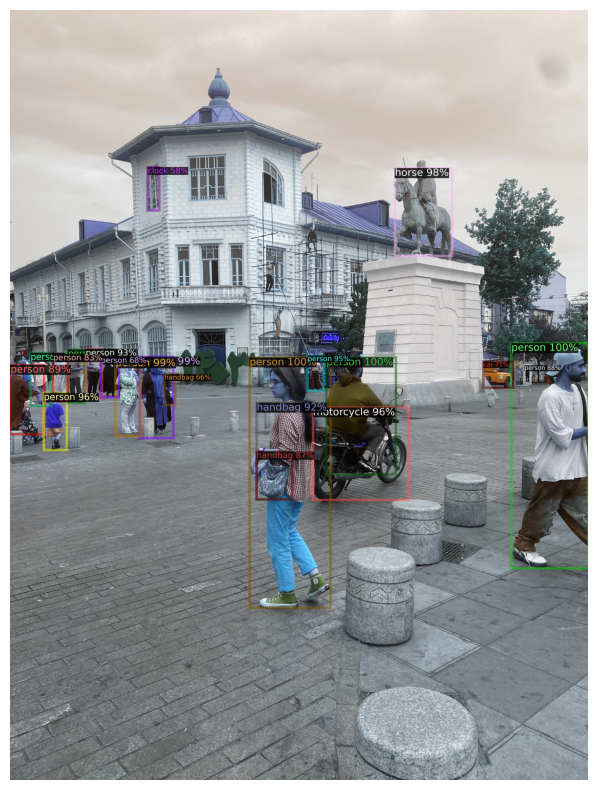

In [19]:
import detectron2
from detectron2.utils.logger import setup_logger
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer

setup_logger()

# Load the image
img_path = '/content/Rasht.jpg'  # Adjust the path based on where the file is located

#img_path = "/Users/Apple/Desktop/Rasht.jpg"
img = cv2.imread(img_path)

# Set up configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(img)

# Visualize the output
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert BGR image to RGB for displaying with matplotlib
output_img = out.get_image()[:, :, ::-1]

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(output_img)
plt.axis('off')
plt.show()
